<a href="https://colab.research.google.com/github/saiku122/AIJobcolle/blob/master/MachineLearning/python/%E6%A9%9F%E6%A2%B0%E5%AD%A6%E7%BF%92%E6%9C%80%E7%B5%82%E8%A9%A6%E9%A8%93.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
!git clone https://github.com/saiku122/AIJobcolle.git

Cloning into 'AIJobcolle'...
remote: Enumerating objects: 470, done.
remote: Counting objects: 100% (470/470), done.
remote: Compressing objects: 100% (347/347), done.
remote: Total 470 (delta 198), reused 221 (delta 70), pack-reused 0
Receiving objects: 100% (470/470), 12.08 MiB | 15.12 MiB/s, done.
Resolving deltas: 100% (198/198), done.


In [46]:
cd /content/AIJobcolle/MachineLearning/python

/content/AIJobcolle/MachineLearning/python


In [47]:
from IPython.core.display import display
import pandas as pd

df = pd.read_csv('./data/av_loan_u6lujuX_CVtuZ9i.csv',header=0)
X=df.iloc[:,1:-1]
y=df.iloc[:,-1]

class_mapping={'N':1,'Y':0}
y=y.map(class_mapping)

display(X.join(y).head())

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,0
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,1
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,0
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,0
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,0


In [48]:
#カテゴリ変数
categoru_columns=['Gender','Married','Dependents','Education','Self_Employed','Property_Area']

In [49]:
y.isnull().sum()

0

In [50]:
X_ohe = pd.get_dummies(X,dummy_na=True,columns=categoru_columns)

In [51]:
display(X_ohe.head())

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Gender_nan,Married_No,Married_Yes,Married_nan,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Dependents_nan,Education_Graduate,Education_Not Graduate,Education_nan,Self_Employed_No,Self_Employed_Yes,Self_Employed_nan,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Property_Area_nan
0,5849,0.0,NaN,360.0,1.0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0
1,4583,1508.0,128.0,360.0,1.0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0
2,3000,0.0,66.0,360.0,1.0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0
3,2583,2358.0,120.0,360.0,1.0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0
4,6000,0.0,141.0,360.0,1.0,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0


In [52]:
from sklearn.impute import SimpleImputer

X_fin=SimpleImputer().fit_transform(X_ohe)

In [53]:
#ホールドアウト法適用
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_fin,
                                              y,
                                              test_size=0.20,
                                              random_state=1)

**ソースコード2**

In [59]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

In [60]:
lr=Pipeline([
             ('scl',StandardScaler()),
             ('est',LogisticRegression())
             ])
rf1=RandomForestClassifier()
rf2=Pipeline([
             ('scl',StandardScaler()),
             ('pca',PCA()),
             ('est',RandomForestClassifier())
             ])

In [61]:
from sklearn.metrics import f1_score

clfs = {
    'logistic':lr,
    'rf1':rf1,
    'rf2':rf2
}
display(X_train)
for clf_name, clf in clfs.items():
  clf.fit(X_train, y_train)
  print(clf_name,':',f1_score(y_test,clf.predict(X_test)))


array([[4.400e+03, 0.000e+00, 1.270e+02, ..., 1.000e+00, 0.000e+00,
        0.000e+00],
       [3.583e+03, 0.000e+00, 9.600e+01, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       [4.333e+03, 2.451e+03, 1.100e+02, ..., 0.000e+00, 1.000e+00,
        0.000e+00],
       ...,
       [3.500e+03, 0.000e+00, 8.100e+01, ..., 1.000e+00, 0.000e+00,
        0.000e+00],
       [5.500e+03, 1.260e+03, 1.700e+02, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [3.667e+03, 1.459e+03, 1.440e+02, ..., 1.000e+00, 0.000e+00,
        0.000e+00]])

logistic : 0.5714285714285713
rf1 : 0.5573770491803278
rf2 : 0.42105263157894735


In [70]:
lr_pg = {
    'est__penalty':('l1','l2'),
    'est__C':[0.1,1.0,10.0]
}

In [71]:
from sklearn.model_selection import GridSearchCV
lr_gs = GridSearchCV(lr,scoring='f1',param_grid=lr_pg)
lr_gs.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_se

GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scl',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('est',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                                                           intercept_scaling=1,
                                                           l1_ratio=None,
                                                           max_iter=100,
                                                           multi_class='auto',
             

In [78]:
print('学習データのF1スコア：',lr_gs.best_score_)
print('検証データのF1スコア：',f1_score(y_test, lr_gs.predict(X_test)))

学習データのF1スコア： 0.586449864498645
検証データのF1スコア： 0.5714285714285713


In [79]:
scl = StandardScaler()
X_fin_std= scl.fit_transform(X_fin)

2
3
4
5
6
7
8
9
10


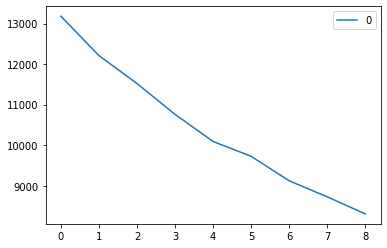

In [84]:
%matplotlib inline

from sklearn.cluster import KMeans

results = []
for i in range(2,11):
  km = KMeans(n_clusters=i,random_state=0)
  km.fit(X_fin_std)
  results.append(km.inertia_)
  print(i)

pd.DataFrame(results).plot()

In [85]:
km = KMeans(n_clusters=3,random_state=0)
km.fit_transform(X_fin_std)

array([[2.73199943, 4.78662289, 3.91271023],
       [4.86774284, 4.77991462, 3.23312394],
       [5.10293578, 5.50414089, 4.28213552],
       ...,
       [5.0378373 , 5.14657193, 3.30406754],
       [4.95261355, 4.90269737, 3.13091151],
       [4.82484421, 7.01889666, 6.5463568 ]])

In [87]:
y_clus=km.transform(X_fin_std)
display(y_clus)

array([[2.73199943, 4.78662289, 3.91271023],
       [4.86774284, 4.77991462, 3.23312394],
       [5.10293578, 5.50414089, 4.28213552],
       ...,
       [5.0378373 , 5.14657193, 3.30406754],
       [4.95261355, 4.90269737, 3.13091151],
       [4.82484421, 7.01889666, 6.5463568 ]])

In [90]:
y_clus = pd.Series(y_clus,name='cls')
X_ohe_with_cls = pd.concat([X_ohe,y_clus],axis=1)

Exception: ignored